In [1]:
#Libraries
%matplotlib inline
import sys

import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import datetime
import time

sns.set()
pal = sns.hls_palette(10 , h=0.5)
sns.set_palette(pal)

In [2]:
df_uber = pd.read_csv('../uber_nyc_data.csv')

In [3]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   origin_taz       object 
 2   destination_taz  object 
 3   pickup_datetime  object 
 4   trip_distance    float64
 5   trip_duration    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


In [4]:
df_uber

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17
...,...,...,...,...,...,...
30925733,30693431,15,15,2015-09-01 00:00:00,6.86,0:27:37
30925734,30693447,5B,2A,2015-09-01 00:00:00,3.44,0:11:07
30925735,30693461,4C,NaN,2015-09-01 00:00:00,6.17,0:19:10
30925736,30693466,2A,5A,2015-09-01 00:00:00,1.87,0:07:54


In [5]:
df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17


In [6]:
import warnings
warnings.simplefilter('ignore')

# Check for missing data

In [7]:
len(df_uber[df_uber.duplicated() == True])
#no duplicate data in the rows

0

In [8]:
arr1 = df_uber.origin_taz.unique()
arr1

array(['7C', '7B', '11', '3B', '2A', '5B', '10', '2B', '9', '6B', '15',
       '4C', '5A', '8', '14', '4A', '7A', '1', '16', '3A', '2C', '6A',
       '12', '13', '3C', '4B', '5C', '17'], dtype=object)

In [9]:
arr2 = df_uber.destination_taz.unique()
arr2

array(['6A', '15', '2A', '4A', '10', '4C', '7A', '3C', '5B', '14', '8',
       nan, '7C', '12', '2C', '1', '6B', '5C', '9', '3A', '2B', '11',
       '7B', '5A', '13', '4B', '18', '16', '3B', '17'], dtype=object)

In [10]:
set(arr2) - set(arr1)

{'18', nan}

In [11]:
df_uber[df_uber.destination_taz.isnull()].head()
#check mdata with missing destination

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15,252596,6B,NaN,2014-09-01 17:00:00,11.67,0:23:45
32,252613,9,NaN,2014-09-01 16:00:00,80.69,1:59:37
63,252644,9,NaN,2014-09-01 18:00:00,23.07,1:03:37
141,252722,9,NaN,2014-09-01 10:00:00,21.73,0:41:12
148,252729,4B,NaN,2014-09-01 10:00:00,4.62,0:14:55


In [12]:
df = df_uber[df_uber.trip_duration.isnull() & df_uber.trip_distance.isnull()]
df.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15155317,39535,2A,11,2015-04-25 12:00:00,NaN,NaN
15245057,1009076,2A,2A,2015-04-26 01:00:00,NaN,NaN
16519652,15028665,2A,7C,2015-04-29 21:00:00,NaN,NaN
17148253,22250173,2A,2A,2015-04-12 02:00:00,NaN,NaN
17297563,23716998,2C,11,2015-04-25 13:00:00,NaN,NaN


In [13]:
len(df_uber[(df_uber.trip_duration.isnull() == False) & (df_uber.trip_distance.isnull())])
##All cases for which trip_duration is null match the cases for which trip_distance is also null:

0

# Analyze the pickup_datetime column to datetime type and create related features.

In [14]:
len(df_uber[df_uber.pickup_datetime.apply(lambda x:x[-5:] == '00:00') == False])
#pickup time data offer mins or sec precision

0

In [15]:
def dateParser(s): # takes a string in format yyy-mm-dd hh:mm:ss and returns the same as a datetime object
    
    return datetime.datetime(int(s[0:4]) , int(s[5:7]) , int(s[8:10]) , int(s[11:13]))

In [16]:
t0 = time.time()
df_uber['pu_date_hour'] = df_uber.pickup_datetime.apply(dateParser)
time.time() - t0

55.87147355079651

In [17]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   origin_taz       object        
 2   destination_taz  object        
 3   pickup_datetime  object        
 4   trip_distance    float64       
 5   trip_duration    object        
 6   pu_date_hour     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.6+ GB


In [18]:
beginning = df_uber.pu_date_hour.min()
end = df_uber.pu_date_hour.max()
print(beginning, end, end - beginning)

2014-09-01 00:00:00 2015-09-01 00:00:00 365 days 00:00:00


In [19]:
df_uber = df_uber.drop('pickup_datetime' , axis = 1) #drop coulmns axis  = 1 means coulmns

In [20]:
t0 = time.time()
df_uber['pu_date'] = pd.Series(map(lambda x: x.astype('datetime64[D]'),df_uber['pu_date_hour'].values))
time.time() - t0
#creation of coulmn with the date and without time

95.75959897041321

In [21]:
df_uber['year'] = df_uber['pu_date_hour'].dt.year
df_uber['month'] = df_uber['pu_date_hour'].dt.month
#get month and year from pickup stamp

In [22]:
t0 = time.time()
df_uber['hour'] = df_uber['pu_date_hour'].dt.hour
time.time() - t0
#get trip pick up hour from timestamp

1.1716160774230957

In [23]:
t0 = time.time()
df_uber['weekday'] = df_uber['pu_date_hour'].dt.dayofweek
time.time() - t0
#trip pickup weekday from timestamp

1.3971025943756104

In [24]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0


In [25]:
df_uber.weekday.value_counts()
#counts as monday = 0 ----- Sunday = 6

weekday
5    5142832
4    4805002
3    4625511
6    4331195
2    4301537
1    4010434
0    3709227
Name: count, dtype: int64

In [26]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0


# Transformation of trip duration data

In [27]:
uniq_dur = df_uber[df_uber.trip_duration.isnull() == False].trip_duration.unique()
uniq_dur

array(['0:15:11', '0:34:05', '0:17:06', ..., '6:21:14', '7:53:17',
       '3:54:35'], dtype=object)

In [28]:
#how many represent >=10h of duration
long_duration = []
for item in uniq_dur:
    if len(item) != 7:
        long_duration.append(item)
print(len(long_duration))

386


In [29]:
#check for unusual string duration
for item in long_duration:
    if len(item) > 8:
        print(item)

172032:14:50
172032:39:03
136:25:12
172032:17:45
172032:19:27
119:53:35
120:49:05


In [30]:
def duration_to_minutes(s):  # Takes hh:mm:ss and returns integer equivalent of total time in mins or zero from data
    if pd.isnull(s):
        val = 0
    else:  
        hms = s.split(':')
        val = int(hms[0]) * 60 + int(hms[1]) + int(hms[2]) / 60.0
    return val  # Return outside the conditional block

In [31]:
#trip duration string into trip duration into mins
t0 = time.time()
df_uber['duration_min'] = df_uber.trip_duration.apply(duration_to_minutes) 
time.time() - t0

37.221052408218384

In [32]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0,15.183333
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0,34.083333
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0,17.100000
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0,6.533333
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0,26.283333


# replace missing values with mean distance and duration for origin to destination

In [33]:
#mean distance and duration for each origin-destination pair
df_DistDur = df_uber.groupby(['origin_taz' , 'destination_taz'])[['trip_distance' , 'duration_min']].mean()

In [34]:
df_DistDur

trip_distance  duration_min
origin_taz destination_taz                             
1          1                     1.421855     10.565513
           10                    3.650791     17.977578
           11                    5.093679     22.489925
           12                    8.887789     29.102406
           13                   11.583137     32.156759
...                                   ...           ...
9          7A                   20.371689     48.185297
           7B                   19.266298     41.968419
           7C                   19.849149     44.587531
           8                    12.198428     29.740010
           9                     2.526192     10.102069

[812 rows x 2 columns]

In [35]:
#replacing missing values with avg distance and duration for the origin-dest pair

for i in df.index:
    orig = df_uber.loc[i , 'origin_taz']
    dest = df_uber.loc[i , 'destination_taz']
    df_uber.loc[i , 'trip_distance'] = df_DistDur.loc[orig , dest].trip_distance
    df_uber.loc[i , 'duration_min'] = df_DistDur.loc[orig , dest].duration_min

# Calculating Avg speed for each trip

In [36]:
#calculate avg speed 
df_uber['trip_mph_avg'] = df_uber.trip_distance/(df_uber.duration_min/60.0)

In [37]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0,15.183333,16.794731
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0,34.083333,17.903178
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0,17.100000,14.105263
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0,6.533333,13.408163
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0,26.283333,18.970197


# calculating estimated revenue per trip

In [38]:
#Source: http://uberestimate.com/prices/New-York-City/ for Uber X

base_fare = 2.55
per_minute = 0.35
per_mile = 1.75
min_fare = 8

In [39]:
#def est_revenue(arr):
#    rev = base_fare + arr[0] * per_minute + arr[1] * per_mile
#    return rev if rev > min_fare else min_fare

In [40]:
#df_uber['est_revenue'] = pd.Series(map(lambda x: est_revenue(x), test))

In [41]:
#Using eval() is even more efficient for large datasets than resorting to Numpy! 
#Local variables must be followed by @. Only for arithmetic, cannot use if statement, for example.
df_uber['est_revenue'] = df_uber.eval('@base_fare + duration_min * @per_minute + trip_distance * @per_mile')
df_uber.loc[df_uber.est_revenue < 8, 'est_revenue'] = min_fare

In [42]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg,est_revenue
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0,15.183333,16.794731,15.301667
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0,34.083333,17.903178,32.276667
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0,17.100000,14.105263,15.570000
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0,6.533333,13.408163,8.000000
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0,26.283333,18.970197,26.291667


# Checking data consistency

In [43]:
#With such a large amount of data it is very difficult to go through all the data and find the anomalies.The possible anomilies have been attended and have been worked upon

In [44]:
#Given below the possible anomalies visible - 1. Cases with distance equal to zero but duration is greater than zero 2.Anomalies with average trip speed

In [45]:
#Check cases with distance equal to zero but duration greater than zero:

print (len(df_uber[(df_uber.duration_min > 0) & (df_uber.trip_distance == 0)]))

85515


In [46]:
#checking small dataset with duration > 5 mins , but distance equal to zero

df_uber[(df_uber.duration_min >= 5) & (df_uber.trip_distance == 0) &(df_uber.origin_taz != df_uber.destination_taz)]\
.head(10)

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg,est_revenue
882890,18153735,1,2A,0.0,0:07:07,2014-09-28 01:00:00,2014-09-28,2014,9,1,6,7.116667,0.0,8.000000
3223424,29754237,4C,6A,0.0,0:07:31,2014-10-05 20:00:00,2014-10-05,2014,10,20,6,7.516667,0.0,8.000000
18154210,2023861,1,4C,0.0,0:27:12,2015-05-28 12:00:00,2015-05-28,2015,5,12,3,27.200000,0.0,12.070000
18829282,8785823,4B,8,0.0,0:38:47,2015-05-26 16:00:00,2015-05-26,2015,5,16,1,38.783333,0.0,16.124167
19414939,14586763,4C,5C,0.0,0:11:01,2015-05-28 18:00:00,2015-05-28,2015,5,18,3,11.016667,0.0,8.000000
20674992,27149481,4C,1,0.0,0:32:51,2015-05-28 11:00:00,2015-05-28,2015,5,11,3,32.850000,0.0,14.047500
21376632,3045165,1,6B,0.0,0:32:49,2015-06-28 23:00:00,2015-06-28,2015,6,23,6,32.816667,0.0,14.035833
21472913,4006319,15,4A,0.0,0:55:44,2015-06-26 10:00:00,2015-06-26,2015,6,10,4,55.733333,0.0,22.056667
21517547,4482860,1,5C,0.0,0:22:21,2015-06-23 13:00:00,2015-06-23,2015,6,13,1,22.350000,0.0,10.372500
21727436,6421520,6B,NaN,0.0,1:18:14,2015-06-26 09:00:00,2015-06-26,2015,6,9,4,78.233333,0.0,29.931667


# Anomalies with average trip speed

In [47]:
#checking trips with speed slower than average walking speed(3mph)

print (len(df_uber[df_uber.trip_mph_avg <=3]))

262666


In [48]:
#possiblity of traffic so distance travelled less than 2 miles

df_uber[(df_uber.trip_mph_avg <= 3) & (df_uber.trip_distance <=2 )].head(10)

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg,est_revenue
82,252663,14,14,0.02,0:01:20,2014-09-01 11:00:00,2014-09-01,2014,9,11,0,1.333333,0.900000,8.000000
120,252701,2A,2A,1.51,0:33:53,2014-09-01 20:00:00,2014-09-01,2014,9,20,0,33.883333,2.673881,17.051667
271,252852,8,8,0.00,0:00:30,2014-09-01 16:00:00,2014-09-01,2014,9,16,0,0.500000,0.000000,8.000000
542,253123,4C,4C,0.05,0:01:06,2014-09-02 17:00:00,2014-09-02,2014,9,17,1,1.100000,2.727273,8.000000
554,253135,2A,2A,0.00,0:02:41,2014-09-02 09:00:00,2014-09-02,2014,9,9,1,2.683333,0.000000,8.000000
605,253186,2A,2A,0.05,0:01:27,2014-09-02 20:00:00,2014-09-02,2014,9,20,1,1.450000,2.068966,8.000000
839,253420,2A,2A,0.47,0:10:35,2014-09-02 13:00:00,2014-09-02,2014,9,13,1,10.583333,2.664567,8.000000
896,253477,5C,6B,0.99,0:22:11,2014-09-02 17:00:00,2014-09-02,2014,9,17,1,22.183333,2.677686,12.046667
945,253526,14,14,0.04,0:01:24,2014-09-02 02:00:00,2014-09-02,2014,9,2,1,1.400000,1.714286,8.000000
1260,253841,4A,4A,0.06,0:01:21,2014-09-02 20:00:00,2014-09-02,2014,9,20,1,1.350000,2.666667,8.000000


# filtering data definig function and loading methods to create visualizations

In [49]:
#Create dataframe to be used for visualization with exactly 365 days of data, and max trip duration of 16h:
df_viz = df_uber[(df_uber.pu_date != datetime.date(2015, 9, 1)) & (df_uber.duration_min <= 960)].copy()

In [50]:
#Descriptive statistics for numerical features:
df_viz[['duration_min', 'trip_distance', 'trip_mph_avg', 'est_revenue']].describe()

,duration_min,trip_distance,trip_mph_avg,est_revenue
count,3.092562e+07,3.092562e+07,3.090075e+07,3.092562e+07
mean,2.099209e+01,5.199671e+00,1.350735e+01,1.924186e+01
std,1.608435e+01,6.130770e+00,1.175680e+01,1.508085e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
25%,1.085000e+01,1.690000e+00,8.410012e+00,9.573333e+00
50%,1.723333e+01,3.090000e+00,1.144891e+01,1.435083e+01
75%,2.668333e+01,6.230000e+00,1.626687e+01,2.303083e+01
max,9.593000e+02,5.685700e+02,2.254800e+04,1.225858e+03


In [51]:
#exporting plotly:
import matplotlib.mlab as mlab
import chart_studio.plotly as py

In [52]:
from matplotlib.ticker import FuncFormatter #calling formatter function
from matplotlib.offsetbox import (OffsetImage , AnnotationBbox) #creating image box
# from matplotlib._png import read_png #load png
from matplotlib.patches import Ellipse #draw ellipse

In [53]:
def thousands_comma(x,pos):#args are the values and tick positions returns number with thousands comma and no decimals
    return '{:,.0f}'.format(x)

In [54]:
def thousands_format(x,pos):#args are the value and tick position , returns number of thousands with one decimal and K in place of 3 zeros
    return '{:.0f}{}'.format(x * 1e-3,'K')

In [55]:
def millions_format(x,pos): #args are the value and tick position , returns number of millions with one decimal and M in place of 6 zeros
    return '{:.1f{}}'.format(x * 1e-6, 'M')

In [56]:
def millions_currency(x,pos): #args are the value and tick position , returns number of millions with RS. sign and M in place of 6 zeros
    return '{}{:.0f}{}'.format('$',x * 1e-6 , 'M')

# Visualizing the number of Uber trips per day

In [57]:
df_viz

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg,est_revenue
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0,15.183333,16.794731,15.301667
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0,34.083333,17.903178,32.276667
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0,17.100000,14.105263,15.570000
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0,6.533333,13.408163,8.000000
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0,26.283333,18.970197,26.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30925733,30693431,15,15,6.86,0:27:37,2015-09-01 00:00:00,2015-09-01,2015,9,0,1,27.616667,14.904043,24.220833
30925734,30693447,5B,2A,3.44,0:11:07,2015-09-01 00:00:00,2015-09-01,2015,9,0,1,11.116667,18.566717,12.460833
30925735,30693461,4C,NaN,6.17,0:19:10,2015-09-01 00:00:00,2015-09-01,2015,9,0,1,19.166667,19.314783,20.055833
30925736,30693466,2A,5A,1.87,0:07:54,2015-09-01 00:00:00,2015-09-01,2015,9,0,1,7.900000,14.202532,8.587500


In [58]:
#Create a plotting data frame with counts (number of trips ) grouped by day:
byDate = df_viz.groupby('pu_date')['id'].count()
byDate

pu_date
2014-09-01     31592
2014-09-02     41496
2014-09-03     46339
2014-09-04     53402
2014-09-05     59718
               ...  
2015-08-28    114108
2015-08-29    123387
2015-08-30    116620
2015-08-31     95583
2015-09-01      1852
Name: id, Length: 366, dtype: int64

In [59]:
byDate['2014-10-28': '2014-11-05']

pu_date
2014-10-28     52084
2014-10-29     61082
2014-10-30     66369
2014-10-31     71787
2014-11-01    104450
2014-11-02     57289
2014-11-03     50491
2014-11-04     52395
2014-11-05     61518
Name: id, dtype: int64

In [60]:
byDate['2015-06-01': '2015-08-31'].mean()

107630.82608695653

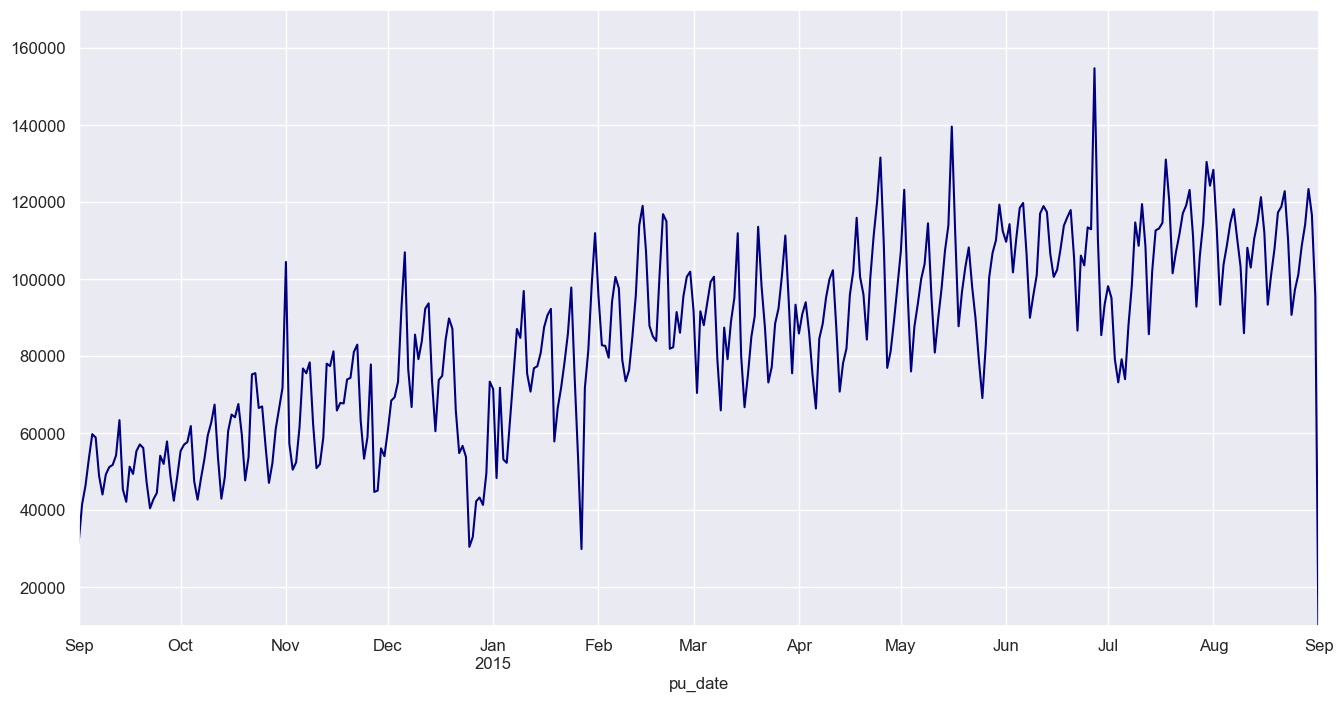

In [61]:
fig = plt.figure()
ax = byDate.plot(figsize = (16,8),fontsize = 12 , ylim = (10000,170000),color = 'navy')

# Efftect of time on demand for uber rides:Distribution per hour,weekday and month

In [62]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

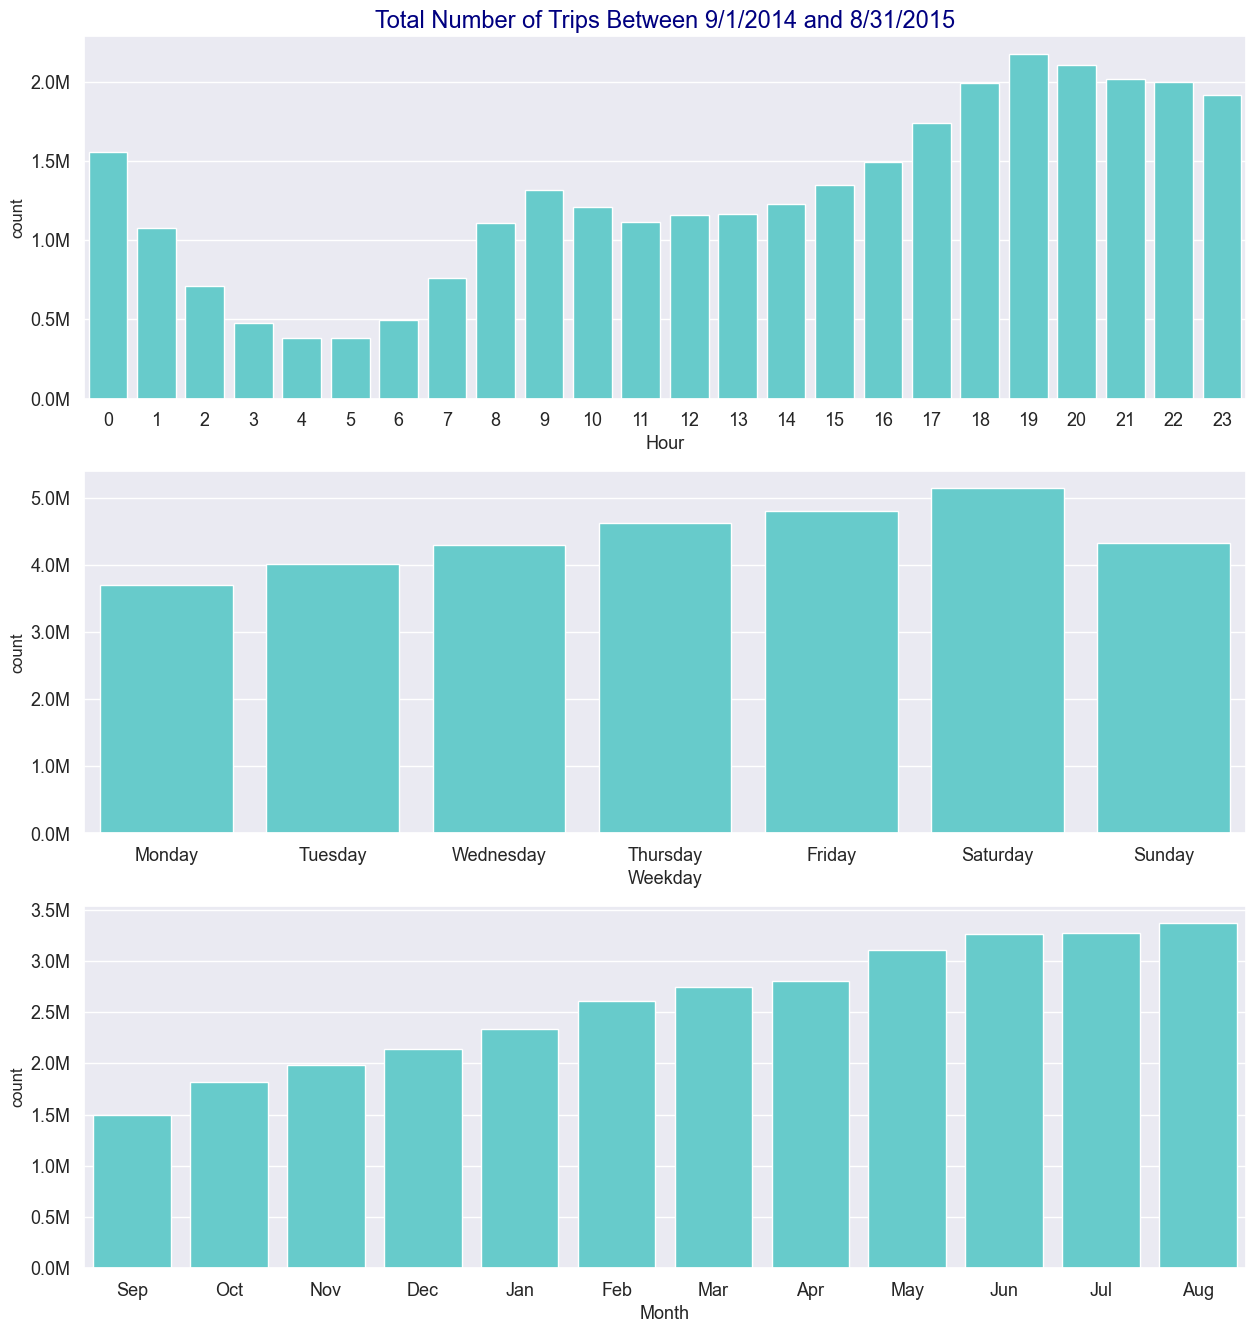

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a formatter function to format millions
def millions_format(x, pos):
    return '{:.1f}M'.format(x * 1e-6)

formatter = FuncFormatter(millions_format)

fig, axes = plt.subplots(3, 1, figsize=(15, 16))

# Hourly plot
sns.countplot(x='hour', data=df_viz, order=range(24), ax=axes[0])
axes[0].yaxis.set_major_formatter(formatter)
axes[0].tick_params(labelsize=13)
axes[0].set_title('Total Number of Trips Between 9/1/2014 and 8/31/2015', fontsize=17, color='navy')
axes[0].set_xlabel('Hour', fontsize=13)

# Weekday plot
sns.countplot(x='weekday', data=df_viz, order=range(7), ax=axes[1])
axes[1].set_xticklabels(weekday_labels)
axes[1].yaxis.set_major_formatter(formatter)
axes[1].tick_params(labelsize=13)
axes[1].set_xlabel('Weekday', fontsize=13)

# Monthly plot
months_seq = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]


sns.countplot(x='month', data=df_viz, ax=axes[2], order=months_seq)
axes[2].set_xticklabels(month_labels)
axes[2].yaxis.set_major_formatter(formatter)
axes[2].tick_params(labelsize=13)
axes[2].set_xlabel('Month', fontsize=13)

plt.show()

# Estimated monthly base revenue:How much was the nyc market worth in that period of time

In [64]:
#creating a dataframe with grouped revenue data:

#byDateRev = df_viz.groupby('month')['est_revenue'].sum()
byDateRev = df_viz.groupby('month')['est_revenue'].sum()

In [65]:
#estimate ubers's gross margin for entire 1 year based on 25% share of the the base revenue
sumRev = byDateRev.sum()
print ('Rs{:,.0f}M'.format(sumRev * 1e-6), "Base Revenue   Uber's Base Gross Margin:", 'Rs{:,.0f}'.format(sumRev * .25))

Rs595M Base Revenue   Uber's Base Gross Margin: Rs148,766,619


In [66]:
#esitmated base gross margin based on information that average Uber fare in sep 2014 was Rs.27
len(df_viz) * 27 * .25

208747901.25

In [67]:
byDateRev

month
1     4.145715e+07
2     4.725285e+07
3     5.215439e+07
4     5.409507e+07
5     6.153991e+07
6     6.366767e+07
7     6.360735e+07
8     6.596110e+07
9     2.996774e+07
10    3.553100e+07
11    3.817069e+07
12    4.166157e+07
Name: est_revenue, dtype: float64

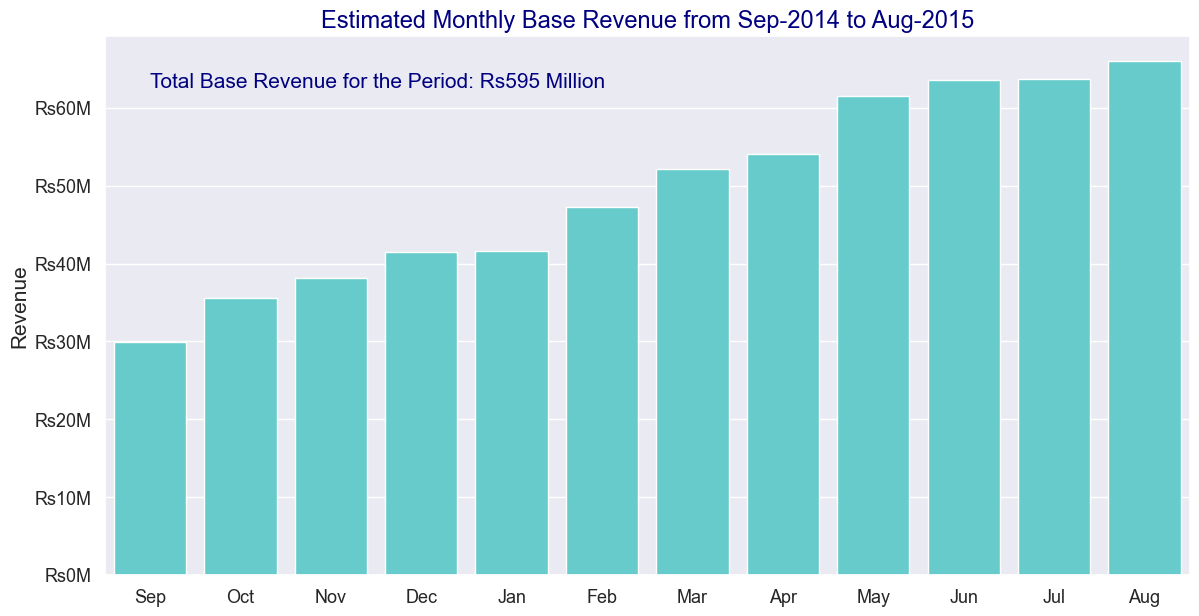

In [68]:
revenues = [2.996774e+07, 3.553100e+07, 3.817069e+07, 4.145715e+07, 4.166157e+07, 4.725285e+07, 
            5.215439e+07, 5.409507e+07, 6.153991e+07, 6.360735e+07, 6.366767e+07, 6.596110e+07]

months_seq = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

formatter = FuncFormatter(lambda x, _: 'Rs{:,.0f}M'.format(x*1e-6))

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=months_seq, y=revenues, order=months_seq)  # Pass x and y explicitly
ax.set_xticks(range(len(month_labels)))  # Set the x-axis tick positions
ax.set_xticklabels(month_labels)  # Set the correct month labels

ax.yaxis.set_major_formatter(formatter)

font = {'color': 'navy', 'size': 15}  # Text parameters
plt.text(0, max(revenues)*0.95, 'Total Base Revenue for the Period: Rs{:,.0f} Million'.format(sum(revenues)*1e-6), fontdict=font)
plt.xlabel('')
plt.ylabel('Revenue', fontsize=15)
plt.tick_params(labelsize=13)
plt.title('Estimated Monthly Base Revenue from Sep-2014 to Aug-2015', fontsize=17, color='navy')

plt.show()

In [69]:
#Mean fare from revenue estimate for the period
df_viz.est_revenue.mean()

19.241863987639547

In [70]:
#estimation of revenue share from Uber from 12/1/14 to 8/31/15

rev = df_viz[(df_viz.pu_date.dt.date >= datetime.date(2014, 12, 1)) & (df_viz.pu_date.dt.date <= datetime.date(2015, 8, 31))] \
    .est_revenue.mean() 

u_pool = rev * 0.75 * 1500000
u_pool 

21565512.055654664

In [71]:
u_pool / df_viz[(pd.to_datetime(df_viz.pu_date).dt.date >= datetime.date(2014, 12, 1)) & (pd.to_datetime(df_viz.pu_date).dt.date <= datetime.date(2015, 8, 31))] \
    .est_revenue.sum()

0.043886124518159604

# Month over Month growth revenue growth: How fast has Uber grown at that peroid of time

In [72]:
#Lots of bugs to be entertained later

In [73]:
#Create dictionary with calculated month over month revenue percentage growth:
dict_growth = {}
for i in range(len(months_seq)):
    mo = months_seq[i]
    rev = byDateRev[mo]
    if mo == 9:
        growth_pct = 0
    elif mo == 1:
        growth_pct = ((rev/byDateRev[12]) - 1) * 100
    else:
        growth_pct = ((rev/byDateRev[mo - 1]) - 1) * 100
    print (month_labels[i], 'Revenue =', '${:,.0f}'.format(rev), 'Growth % = ', '{:.1f}'.format(growth_pct))
    dict_growth[month_labels[i]] = growth_pct

Sep Revenue = $29,967,741 Growth % =  0.0
Oct Revenue = $35,531,001 Growth % =  18.6
Nov Revenue = $38,170,687 Growth % =  7.4
Dec Revenue = $41,661,569 Growth % =  9.1
Jan Revenue = $41,457,151 Growth % =  -0.5
Feb Revenue = $47,252,852 Growth % =  14.0
Mar Revenue = $52,154,385 Growth % =  10.4
Apr Revenue = $54,095,066 Growth % =  3.7
May Revenue = $61,539,912 Growth % =  13.8
Jun Revenue = $63,667,666 Growth % =  3.5
Jul Revenue = $63,607,348 Growth % =  -0.1
Aug Revenue = $65,961,099 Growth % =  3.7


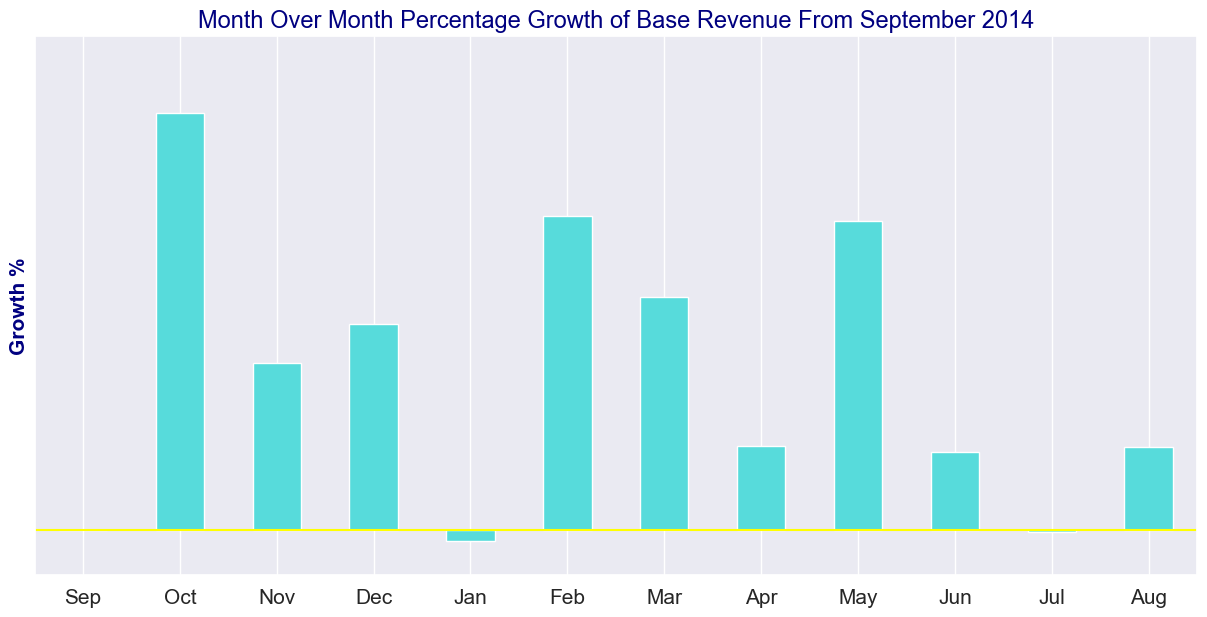

In [74]:
#Annotate Total Cummulative Growth for the Period

df_plt1 = pd.DataFrame(pd.Series(dict_growth), index = month_labels, columns = ['growth_pct'])

labels_list = df_plt1.growth_pct.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt1.plot(kind = 'bar', figsize = (15,7), fontsize = 14, rot = 0, legend=False)#df_plt2[1:] to exclude Sep
# ax.set_axis_bgcolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
# annotate_labels(ax, labels_list, **kwargs)

plt.axhline(0, color='yellow')
plt.title('Month Over Month Percentage Growth of Base Revenue From September 2014', 
          fontsize = 17, color='navy')
plt.ylabel('Growth %', fontsize = 15, weight='bold', color='navy')
plt.ylim(-2, 22)
plt.tick_params(labelsize=15)

plt.show()

# Day of week has the slowest traffic overall

In [75]:
#create dataframe with grouped data.
df_plt2 = df_viz.groupby('weekday')['trip_mph_avg'].median()

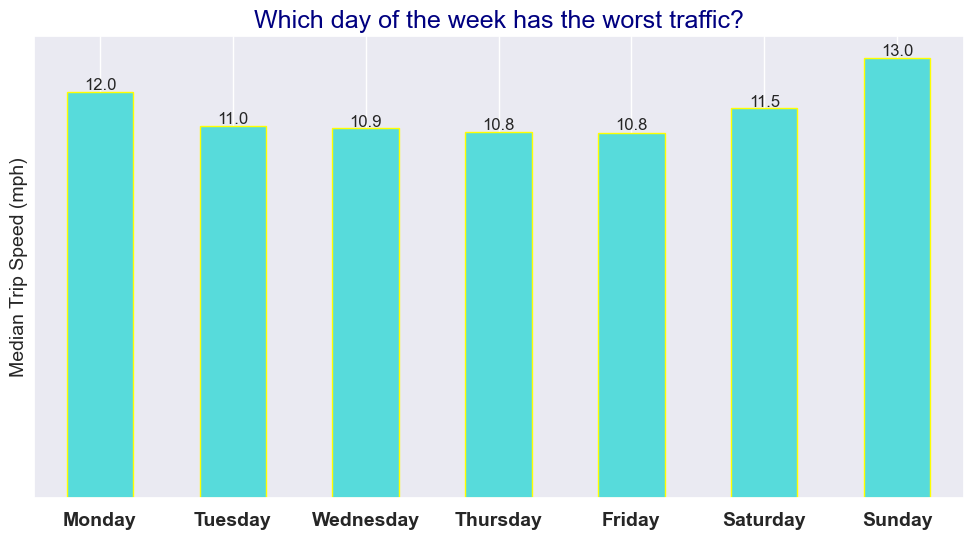

In [76]:
#creating plot

fig = plt.figure()
labels_list = df_plt2.values.round(1)
kwargs = {'fontsize':12 , 'ha':'center' , 'va':'bottom','weight':'bold','color':'navy'}
ax = df_plt2.plot(kind='bar', rot=0, figsize=(12, 6), fontsize=12, edgecolor='yellow', linewidth=1)

# Add labels to each bar
for i in range(len(labels_list)):
    plt.annotate(str(labels_list[i]), xy=(i, labels_list[i]), ha='center', va='bottom')

ax.set_xticklabels(weekday_labels, weight='bold')
ax.get_yaxis().set_ticks([])
plt.xlabel('')
plt.ylabel('Median Trip Speed (mph)', fontsize=14)
plt.tick_params(labelsize=14)
plt.title('Which day of the week has the worst traffic?', fontsize=18, color='navy')
plt.show()

# Median distance travelled per trip?

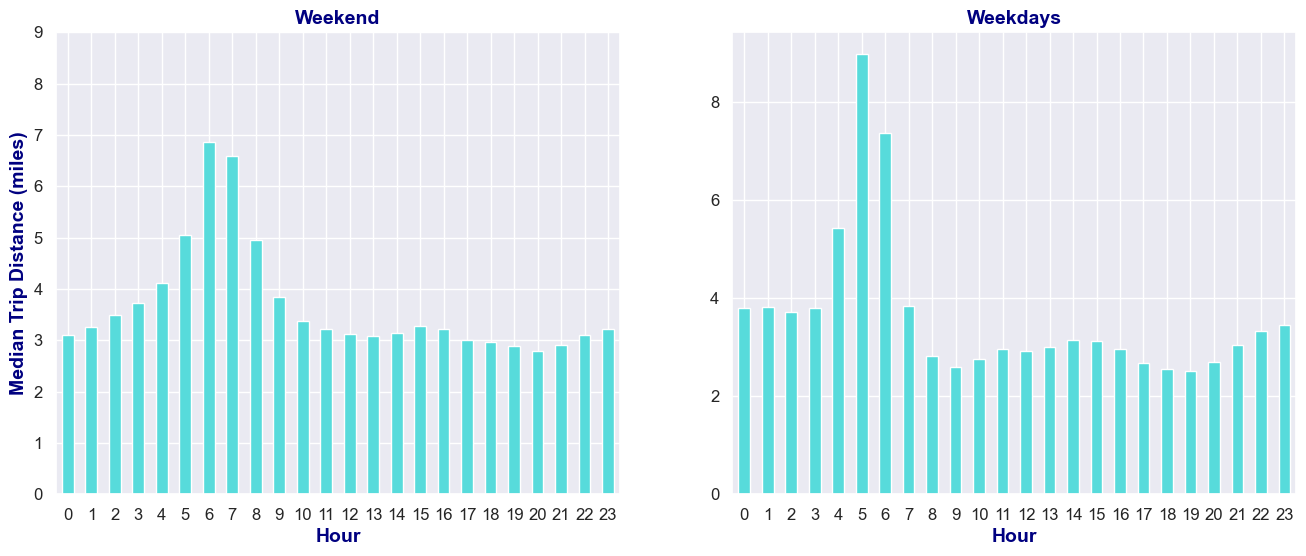

In [77]:
import matplotlib.pyplot as plt

# Create subplots using plt.subplots()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for weekends
df_viz[df_viz.weekday >= 5].groupby('hour')['trip_distance'].median().plot(kind='bar', rot=0, ax=ax1, fontsize=14)
ax1.set_ylim(0, 9)
ax1.tick_params(labelsize=12)
ax1.set_ylabel('Median Trip Distance (miles)', fontsize=14, weight='bold', color='navy')
ax1.set_xlabel('Hour', fontsize=14, weight='bold', color='navy')
ax1.set_title('Weekend', fontsize=14, weight='bold', color='navy')

# Plot for weekdays
df_viz[df_viz.weekday < 5].groupby('hour')['trip_distance'].median().plot(kind='bar', rot=0, ax=ax2, fontsize=14)
ax2.tick_params(labelsize=12)
ax2.set_xlabel('Hour', fontsize=14, weight='bold', color='navy')
ax2.set_title('Weekdays', fontsize=14, weight='bold', color='navy')

plt.show()


# What are the most popular pickup and drop off taxi zones

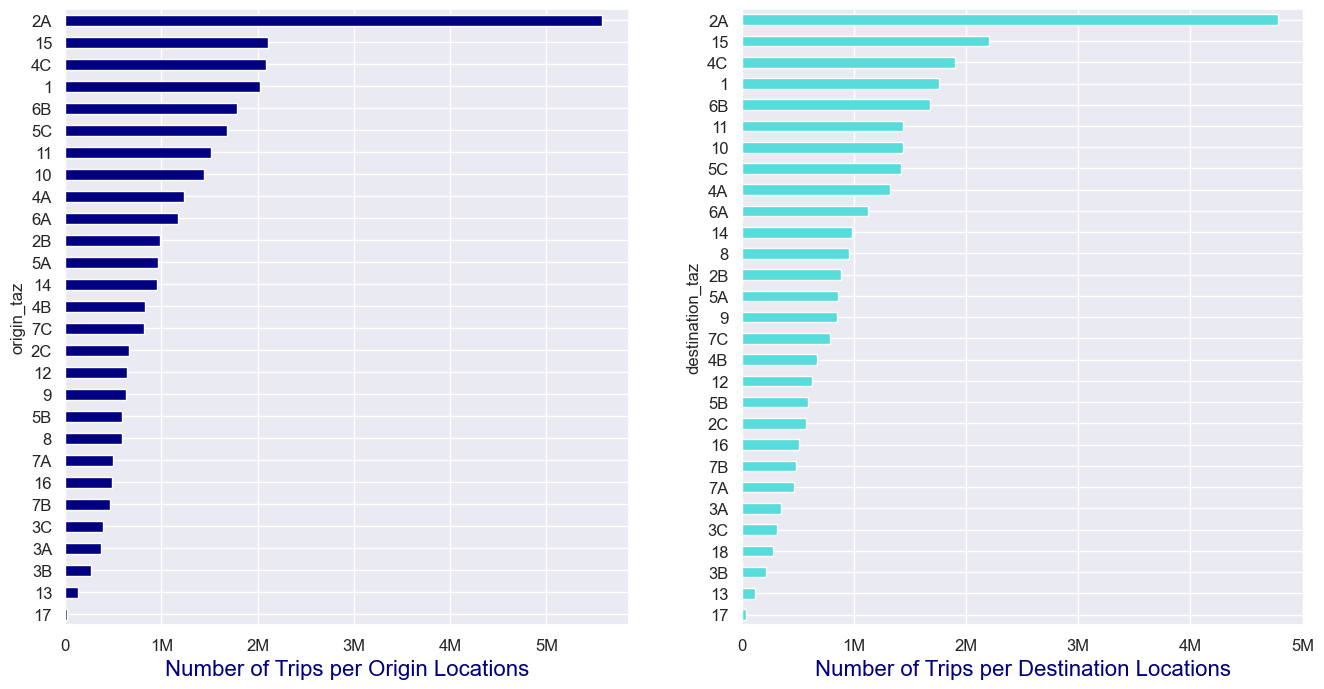

In [78]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(1,2,1)
df_viz.origin_taz.value_counts(ascending=True).plot(kind='barh', color='navy', ax=ax1)
ax1.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Number of Trips per Origin Locations', fontsize=16, color='navy')

ax2 = fig.add_subplot(1,2,2)
df_viz.destination_taz.value_counts(ascending=True).plot(kind='barh', ax=ax2)
ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
ax2.tick_params(labelsize=12)
ax2.set_xlabel('Number of Trips per Destination Locations', fontsize=16, color='navy')

plt.show()

# Visualizing the most popular pick up and drop off location pairs

In [79]:
#Define data to plot:
df_plt3 = df_viz.pivot_table('id', aggfunc='count', index='origin_taz', columns='destination_taz')

In [80]:
df_plt3.shape

(28, 29)

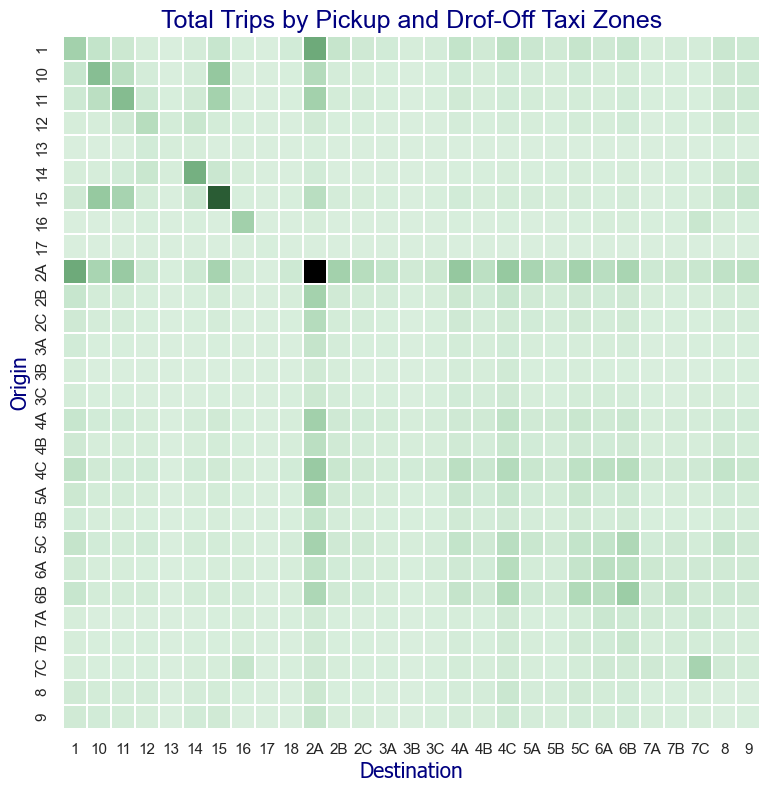

In [81]:
#Visualize the origin versus destination matrix via a heatmap:

fig = plt.figure(figsize=(9,9))

cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.9, as_cmap=True) #'YlOrRd' #ggplot:'viridis'

sns.heatmap(df_plt3, cmap=cmap, linewidths=0.1, cbar=False)

plt.title('Total Trips by Pickup and Drof-Off Taxi Zones', fontsize=18, color='navy')
plt.xlabel('Destination', fontsize=15, fontname='Tahoma', color='navy')
plt.ylabel('Origin', fontsize=15, fontname='Tahoma', color='navy')
plt.tick_params(labelsize=11)
plt.show()

In [82]:
len(df_viz[(df_viz.origin_taz.isin(['2A', '15', '4C', '1', '6B']) == True) & \
           (df_viz.destination_taz.isin(['2A', '15', '4C', '1', '6B']) == True)])

6231752

# What is the mean time and distance to destination from the most popular pick up location?

In [83]:
#Plot the mean travel time from the most popular origin, to all possible destinations.
df_plt4 = df_viz[df_viz.origin_taz == '2A'].groupby('destination_taz')['trip_distance'].mean().sort_values()
df_plt5 = df_viz[df_viz.origin_taz == '2A'].groupby('destination_taz')['duration_min'].mean().sort_values()

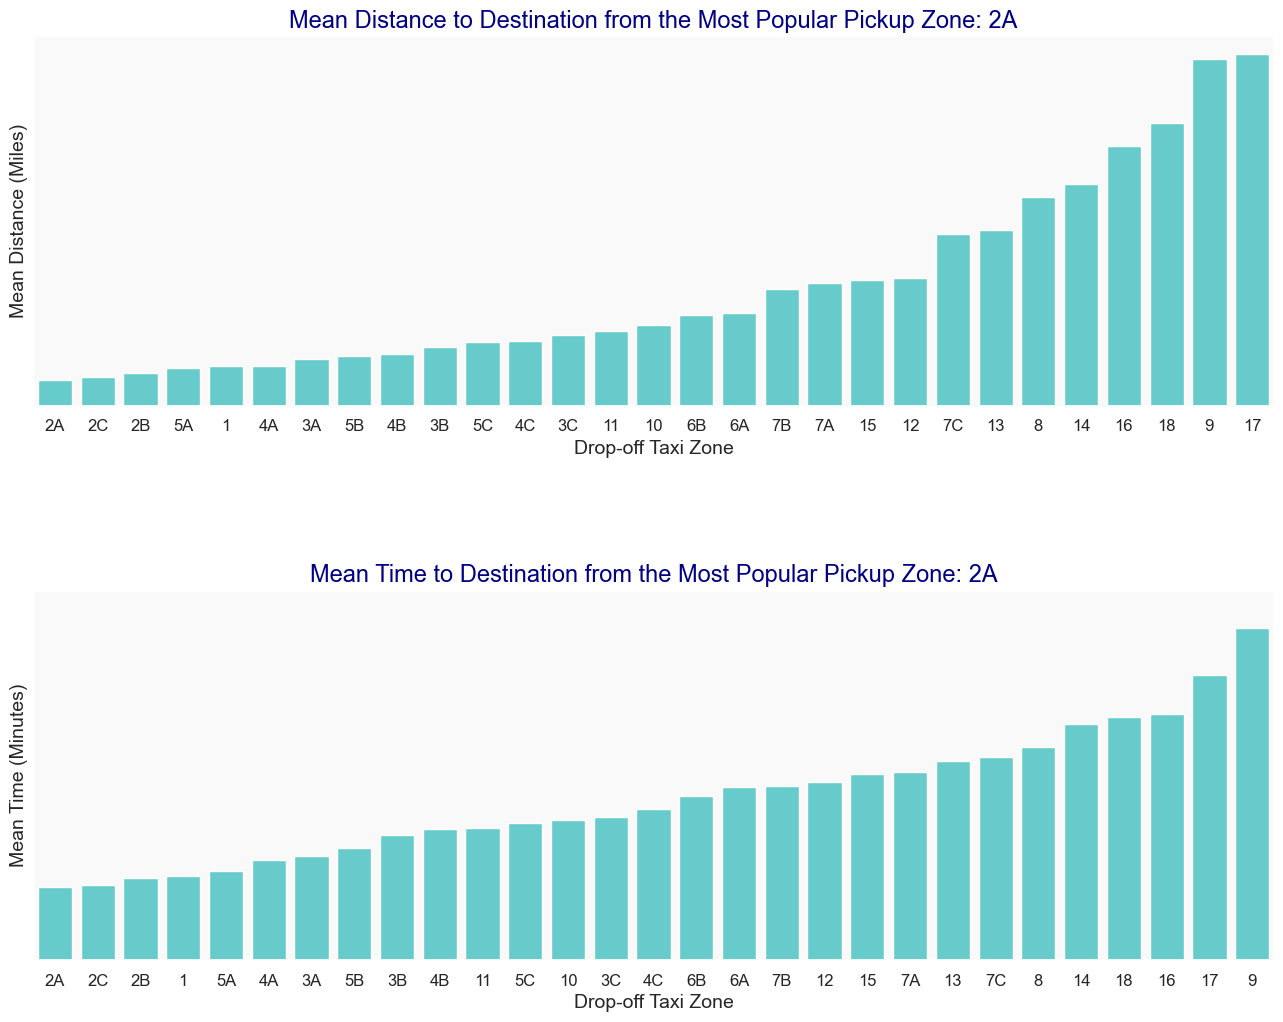

In [84]:
fig = plt.figure(figsize=(16, 12))
kwargs = {'fontsize': 12, 'ha': 'center', 'va': 'bottom', 'color': 'navy'}

plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=df_plt4.index, y=df_plt4.values)
ax1.set_facecolor('#F9F9F9')  # Set background color
ax1.get_yaxis().set_ticks([])
labels_list = df_plt4.values.round(1)
#annotate_labels(ax1, labels_list, **kwargs)
plt.title('Mean Distance to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Distance (Miles)', fontsize=14)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=df_plt5.index, y=df_plt5.values)
ax2.set_facecolor('#F9F9F9')  # Set background color
ax2.get_yaxis().set_ticks([])
labels_list = df_plt5.apply(lambda x: '{:.0f}'.format(round(x))).values
#annotate_labels(ax2, labels_list, **kwargs)
plt.title('Mean Time to Destination from the Most Popular Pickup Zone: 2A', fontsize=17, color='navy')
plt.ylabel('Mean Time (Minutes)', fontsize=14)
plt.ylim(0, 55)
plt.xlabel('Drop-off Taxi Zone', fontsize=14)
plt.tick_params(labelsize=12)

fig.subplots_adjust(hspace=0.5)
plt.show()


# Visualization of variable distributions relationships

In [85]:
df_viz.trip_distance.max(), df_uber.trip_distance.max()

(568.57, 2593.08)

In [86]:
freq, bins_dist = np.histogram(df_viz.trip_distance, bins=10, range=(0, 25))
freq, bins_dist

(array([12709827,  8364570,  3567013,  2035400,  1296935,   672724,
          706029,   747773,   299952,   132574], dtype=int64),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]))

In [87]:
df_viz.trip_distance.median(), df_viz.trip_distance.mean()

(3.09, 5.199671270671474)

In [88]:
df_viz[df_viz.trip_distance >= 300].head(10) 

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg,est_revenue
943214,19594602,10,15,371.55,7:54:17,2014-09-16 10:00:00,2014-09-16,2014,9,10,1,474.283333,47.003549,818.761667
3620586,5138875,14,NaN,357.27,5:09:31,2014-11-04 23:00:00,2014-11-04,2014,11,23,1,309.516667,69.257014,736.103333
10581718,10072444,16,NaN,330.90,10:48:30,2015-02-04 18:00:00,2015-02-04,2015,2,18,2,648.500000,30.615266,808.600000
11224977,17353914,15,15,378.01,10:00:46,2015-02-25 15:00:00,2015-02-25,2015,2,15,2,600.766667,37.752760,874.335833
11684172,23119455,14,14,350.15,9:19:21,2015-02-03 18:00:00,2015-02-03,2015,2,18,1,559.350000,37.559667,811.085000
13829799,16426984,15,NaN,568.57,10:52:19,2015-03-27 19:00:00,2015-03-27,2015,3,19,4,652.316667,52.296993,1225.858333
16530542,15478567,7A,17,315.57,4:08:04,2015-04-09 01:00:00,2015-04-09,2015,4,1,3,248.066667,76.327063,641.620833
18643154,6860856,5C,16,308.42,5:04:11,2015-05-31 05:00:00,2015-05-31,2015,5,5,6,304.183333,60.835680,648.749167
18854980,9245564,15,15,302.79,7:21:40,2015-05-10 22:00:00,2015-05-10,2015,5,22,6,441.666667,41.133736,687.015833
18949729,10208984,4A,7C,335.30,13:33:40,2015-05-09 16:00:00,2015-05-09,2015,5,16,5,813.666667,24.725113,874.108333


# Distribution of trip duration (in minutes)

In [89]:
df_viz.duration_min.describe()

count    3.092562e+07
mean     2.099209e+01
std      1.608435e+01
min      0.000000e+00
25%      1.085000e+01
50%      1.723333e+01
75%      2.668333e+01
max      9.593000e+02
Name: duration_min, dtype: float64

In [90]:
freq, bins_dur = np.histogram(df_viz.duration_min, bins=10, range=(0, 50))
freq, bins_dur


(array([1235201, 5391527, 6312324, 5266965, 3929223, 2777187, 1878407,
        1256167,  852543,  589921], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

# Histograms for trip distance and duration

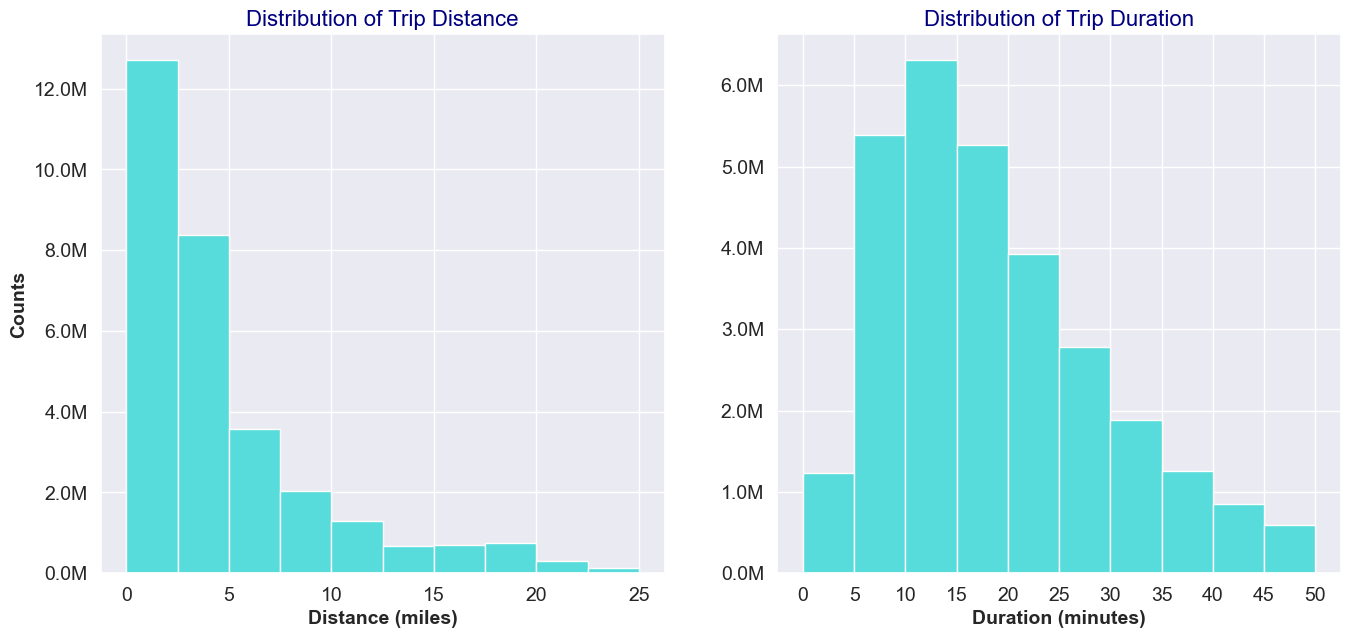

In [91]:
fig = plt.figure(figsize=(16, 7))

formatter = FuncFormatter(millions_format)

plt.subplot(1,2,1)
ax1 = df_viz.trip_distance.dropna().hist(bins=bins_dist)
ax1.yaxis.set_major_formatter(formatter)

plt.xlabel('Distance (miles)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Distance', color='navy', fontsize=16)


plt.subplot(1,2,2)
ax2 = df_viz.duration_min.hist(bins=bins_dur)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_xticks(bins_dur) #bins are in 5 minutes intervals.

plt.xlabel('Duration (minutes)', fontsize=14, weight='bold')
plt.ylabel('')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip Duration', color='navy', fontsize=16)

plt.show()

# Trip distance vs Trip duration

In [92]:
# Create data to plot with average distance and duration grouped by origin-destination location pairs
df_plt6 = df_viz.groupby(['origin_taz', 'destination_taz'])[['trip_distance', 'duration_min']].mean()

df_plt6_values = df_plt6.values

In [93]:
df_plt6.shape

(812, 2)

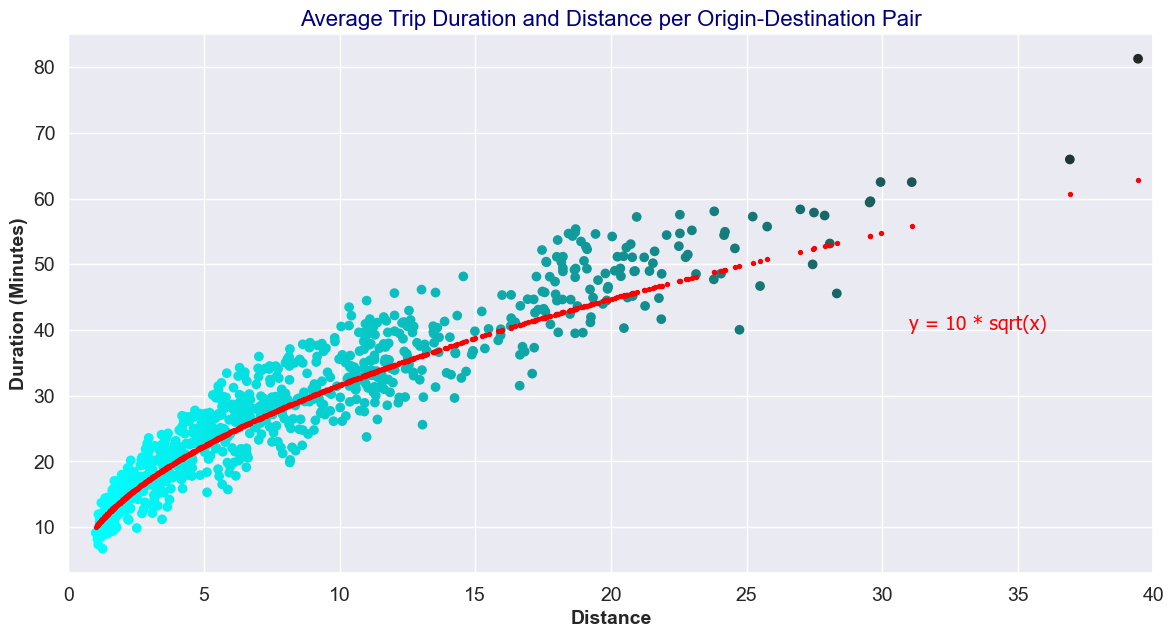

In [94]:
distance = df_plt6.values[:,:1]
duration = df_plt6.values[:,1:]
duration_hat = pd.Series(distance.reshape(812,)).apply(lambda x: 10*np.sqrt(x))

plt.figure(figsize = (14,7))
cmap = sns.dark_palette('cyan', 3, reverse = True, as_cmap=True)

plt.scatter(distance, duration, c=distance, cmap= cmap) # it looks like a 10*sqrt(x) power distribution
plt.scatter(distance, duration_hat, color='red', s=8)

font = {'color': 'red', 'size': 14, 'family': 'Tahoma'}
plt.text(31, 40, 'y = 10 * sqrt(x)', fontdict = font) 
plt.xlim(0, 40)
plt.xlabel('Distance', fontsize = 14, weight='bold')
plt.ylabel('Duration (Minutes)', fontsize = 14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Average Trip Duration and Distance per Origin-Destination Pair', fontsize = 16, color='navy')


plt.show()

In [95]:
df_plt6[df_plt6.trip_distance > 25]

trip_distance  duration_min
origin_taz destination_taz                             
13         18                   28.071694     53.168548
14         17                   27.880822     57.425156
           18                   29.943150     62.517062
16         17                   31.092205     62.504593
           18                   28.329221     45.567876
17         14                   27.487630     57.879287
           16                   39.435263     81.276901
           7C                   25.229773     57.257576
           9                    25.500478     46.694663
7A         17                   29.569512     59.605488
7C         17                   26.983182     58.360985
8          17                   25.761857     55.740833
           18                   29.537605     59.405964
9          17                   27.438142     49.989370
           18                   36.920512     65.957674

# Distribution of average speed per trip

In [96]:
df_viz.trip_mph_avg.describe()

count    3.090075e+07
mean     1.350735e+01
std      1.175680e+01
min      0.000000e+00
25%      8.410012e+00
50%      1.144891e+01
75%      1.626687e+01
max      2.254800e+04
Name: trip_mph_avg, dtype: float64

In [97]:
freq, bins = np.histogram(df_viz.trip_mph_avg, bins=10, range=(0, 50))
freq, bins

(array([ 1313452, 10564985,  9862416,  4248624,  2152852,  1282011,
          767843,   434359,   196184,    61865], dtype=int64),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]))

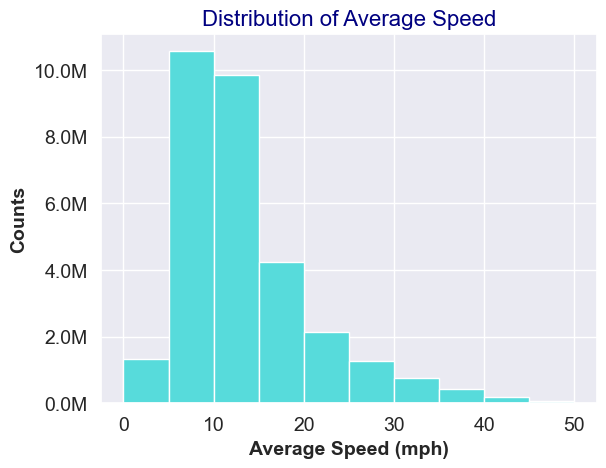

In [98]:
fig, ax = plt.subplots(1,1)

formatter = FuncFormatter(millions_format)

ax.hist(df_viz.trip_mph_avg.dropna(), bins)
ax.yaxis.set_major_formatter(formatter)

plt.xlabel('Average Speed (mph)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Average Speed', color='navy', fontsize=16)
plt.show()

In [99]:
#Median trip average speed during weekdays:
df_plt7 = df_viz[df_viz.weekday < 5].groupby('hour')['trip_mph_avg'].median()
df_plt7.head()

hour
0    14.301370
1    15.374738
2    16.127389
3    16.612460
4    19.501926
Name: trip_mph_avg, dtype: float64

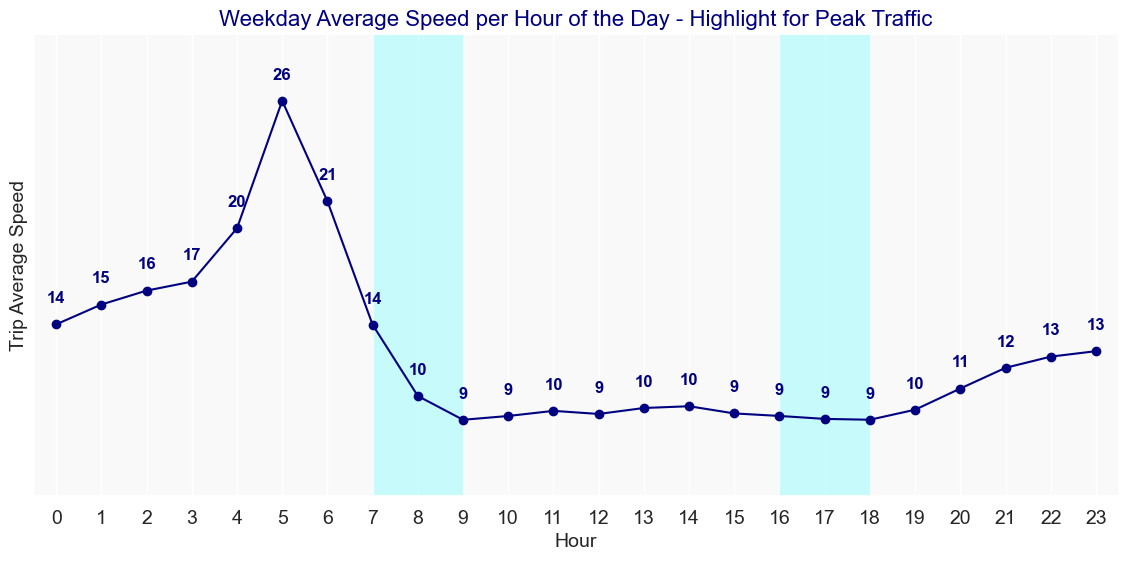

In [100]:
plt.figure(figsize=(14, 6))
kwargs = {'fontsize': 12, 'ha': 'center', 'va': 'top', 'color': 'navy', 'weight': 'bold'}

# weekdays only: rush hour traffic 7-9 + 16-18
ax = df_plt7.plot(marker='o', color='navy')

for x, y in zip(df_plt7.index, df_plt7.values):
    ax.annotate('{:.0f}'.format(y), xy=(x, y), xytext=(0, 24), textcoords='offset points', **kwargs)

# Set face color instead of axis background color
ax.set_facecolor('#F9F9F9')

ax.get_yaxis().set_ticks([])  # hide tick labels on y-axis
plt.fill([7, 9, 9, 7], [0, 0, 30, 30], 'cyan', alpha=0.2)
plt.fill([16, 18, 18, 16], [0, 0, 30, 30], 'cyan', alpha=0.2)
plt.xticks(range(24))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Trip Average Speed', fontsize=14)
plt.ylim(5, 30)
plt.xlim(-0.5, 23.5)
plt.tick_params(labelsize=14)
plt.title('Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic', fontsize=16, color='navy')
plt.show()


In [101]:
def is_peak_hour(x):

    return 1 if x[0] in (7,8,9,16,17,18) and x[1] < 5 else 0 #total peak hour periods = 6h

In [102]:
df_viz['peak_hour'] = pd.Series(map(lambda x: is_peak_hour(x), df_viz.loc[:, ['hour', 'weekday']].values))

In [103]:
df_viz.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,hour,weekday,duration_min,trip_mph_avg,est_revenue,peak_hour
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,9,0,15.183333,16.794731,15.301667,1.0
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,18,0,34.083333,17.903178,32.276667,1.0
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,17,0,17.100000,14.105263,15.570000,1.0
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,13,0,6.533333,13.408163,8.000000,0.0
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,14,0,26.283333,18.970197,26.291667,0.0
